## Calculating VaR

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter as ff
from pypfopt.efficient_frontier import EfficientFrontier as ef
from pypfopt import risk_models as rm
from pypfopt import expected_returns as er

In [2]:
def ticker_frame(tickers, start="2011-01-31", end="2021-02-01", source="yahoo"):
    stock_price = []

    for ticker in range(len(tickers)):
        price_data = pdr.DataReader(tickers[ticker], start=start, end=end, data_source=source)
        stock_price.append(price_data[["Adj Close"]])
    
    df = pd.concat(stock_price, axis=1)
    df.columns=tickers
    return df

In [3]:
tickers = ['RBC','CM.TO','TD','BNS','BMO','NA.TO']
df = ticker_frame(tickers)

In [4]:
df.head()

,RBC,CM.TO,TD,BNS,BMO,NA.TO
Date,,,,,,
2011-01-31,58.307770,46.526379,25.640566,36.011948,38.764851,22.944351
2011-02-01,59.932766,47.008301,26.270536,36.870743,39.362667,23.138269
2011-02-02,59.286289,46.819199,26.393785,37.067940,39.631367,23.003515
2011-02-03,61.968403,47.404812,26.790953,37.475063,40.081417,23.197426
2011-02-04,61.715050,47.508503,27.153864,37.532326,40.067986,23.259871


In [5]:
df.tail()

,RBC,CM.TO,TD,BNS,BMO,NA.TO
Date,,,,,,
2021-01-26,130.638351,109.582733,58.110001,54.799999,76.318039,72.732796
2021-01-27,124.042061,108.218636,56.990002,53.330002,75.002380,73.040268
2021-01-28,125.718575,109.068718,57.650002,54.009998,75.862999,73.208885
2021-01-29,125.219612,107.724396,56.590000,53.290001,74.309998,71.284691
2021-02-01,128.293213,107.961624,56.560001,53.349998,74.480003,71.711189


In [6]:
mu = er.mean_historical_return(df)
sigma = rm.sample_cov(df)

In [7]:
mu

RBC      0.080719
CM.TO    0.086390
TD       0.080989
BNS      0.039446
BMO      0.066392
NA.TO    0.118711
dtype: float64

In [8]:
sigma

,RBC,CM.TO,TD,BNS,BMO,NA.TO
RBC,0.090804,0.027390,0.038154,0.038592,0.038898,0.029170
CM.TO,0.027390,0.033211,0.030022,0.030763,0.031576,0.028397
TD,0.038154,0.030022,0.045035,0.041720,0.041292,0.031964
BNS,0.038592,0.030763,0.041720,0.048817,0.042719,0.033872
BMO,0.038898,0.031576,0.041292,0.042719,0.048462,0.034204
NA.TO,0.029170,0.028397,0.031964,0.033872,0.034204,0.041651


In [9]:
from pypfopt import objective_functions, base_optimizer

In [10]:
markowitz = ef(mu, sigma, weight_bounds=(0,1))
sharpe_ratio = markowitz.max_sharpe()

In [11]:
markowitz

In [12]:
sharpe_ratio

OrderedDict([('RBC', 6.168834651e-07),
             ('CM.TO', 1.4585464534e-06),
             ('TD', -4.9030055795e-06),
             ('BNS', -7.071945055e-07),
             ('BMO', 3.6137578985e-06),
             ('NA.TO', 0.9999999194618888)])

### What is Sharpe ratio?

The Sharpe ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

Reference: https://www.investopedia.com/terms/s/sharperatio.asp

In [13]:
clean_weights = markowitz.clean_weights()

In [14]:
clean_weights

OrderedDict([('RBC', 0.0),
             ('CM.TO', 0.0),
             ('TD', 0.0),
             ('BNS', 0.0),
             ('BMO', 0.0),
             ('NA.TO', 1.0)])

In [15]:
ticker_rx2 = []
sh_wt = list(clean_weights.values())
sh_wt = np.array(sh_wt)

In [16]:
for a in range(len(tickers)):
    ticker_rx = df[[tickers[a]]].pct_change()
    ticker_rx = (ticker_rx+1).cumprod()
    ticker_rx2.append(ticker_rx[[tickers[a]]])

ticker_final = pd.concat(ticker_rx2, axis=1)
ticker_final

,RBC,CM.TO,TD,BNS,BMO,NA.TO
Date,,,,,,
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,1.027869,1.010358,1.024569,1.023848,1.015422,1.008452
2011-02-02,1.016782,1.006294,1.029376,1.029323,1.022353,1.002579
2011-02-03,1.062781,1.018880,1.044866,1.040629,1.033963,1.011030
2011-02-04,1.058436,1.021109,1.059020,1.042219,1.033616,1.013752
...,...,...,...,...,...,...
2021-01-26,2.240496,2.355282,2.266331,1.521717,1.968743,3.169965
2021-01-27,2.127368,2.325963,2.222650,1.480897,1.934804,3.183366
2021-01-28,2.156120,2.344234,2.248390,1.499780,1.957005,3.190715


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


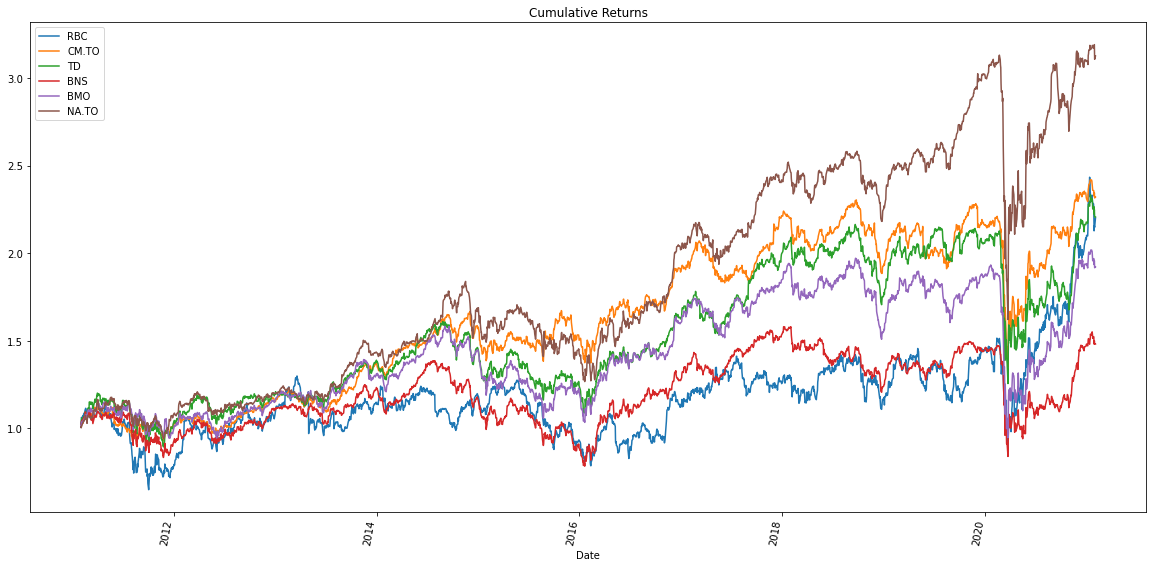

In [17]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(ticker_final.columns):
    ticker_final[col].plot()
    plt.title('Cumulative Returns')

plt.xticks(rotation=80)
plt.legend(ticker_final.columns)
plt.savefig('returns.eps', dpi=100)

In [18]:
pret = []
pre1 = []
price =[]

for x in range(len(tickers)):
    pret.append(ticker_final.iloc[[-1],[x]])
    price.append((df.iloc[[-1],[x]]))
    pre1 = pd.concat(pret,axis=1)
    
pre1 = np.array(pre1)
price = pd.concat(price,axis=1)
varsigma = pre1.std()
ex_rtn=pre1.dot(sh_wt)

print(f'The weighted expected portfolio return: {ex_rtn}')
print("\n")
print(varsigma)
print("\n")
print(price)

The weighted expected portfolio return: [3.12543984]


0.4940388642038148


                   RBC       CM.TO         TD        BNS        BMO      NA.TO
Date                                                                          
2021-02-01  128.293213  107.961624  56.560001  53.349998  74.480003  71.711189


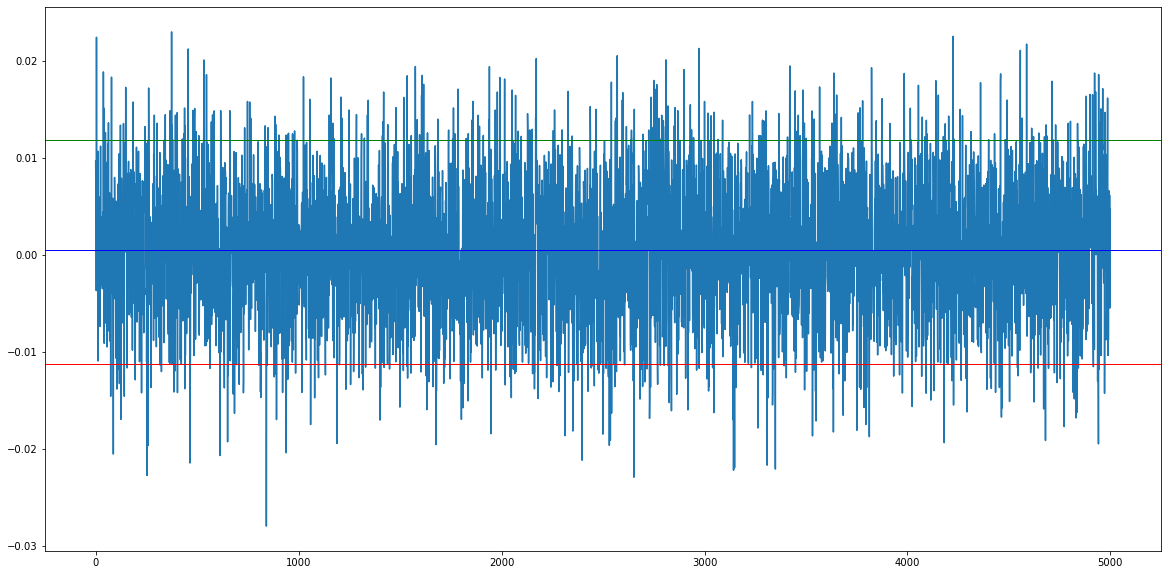

In [19]:
from scipy.stats import norm 
import math
Time = 5000 
lt_price = []
final_res = []
plt.figure(figsize=(20, 10))
for i in range(100): 
    daily_returns = (np.random.normal(ex_rtn/Time,varsigma/math.sqrt(Time), Time))
    
plt.plot(daily_returns)
plt.axhline(np.percentile(daily_returns,5), color='r', linestyle='solid', linewidth=1)
plt.axhline(np.percentile(daily_returns,95), color='g', linestyle='solid', linewidth=1)
plt.axhline(np.mean(daily_returns), color='b', linestyle='solid', linewidth=1)
plt.show()

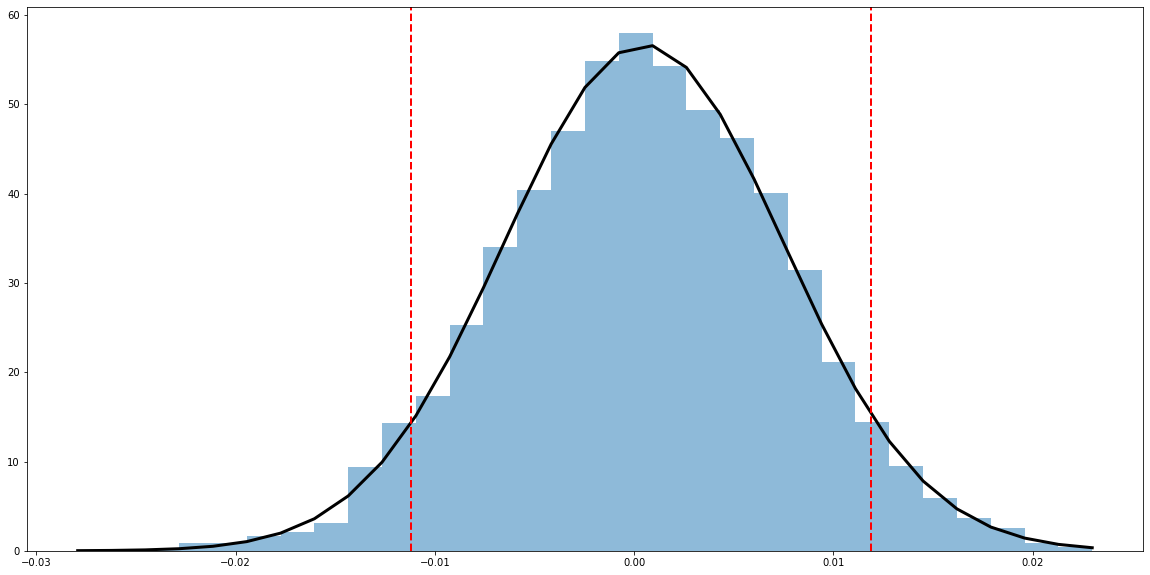

In [20]:
plt.figure(figsize=(20, 10))

_,bins,_ = plt.hist(daily_returns, bins=30, density=1, alpha=0.5)
mu, sigma = norm.fit(daily_returns)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, color="black", linewidth="3")

plt.axvline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(daily_returns,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

Note: I am using 30 bins. The data is approximately normally distributed as can be seen above. This means that given enough points, we can expect the daily returns of the big 6 banks in Canada to be normally distributed (approximately).

In [21]:
print(np.percentile(daily_returns, 5), np.percentile(daily_returns, 95))

portfolio_size = 100000

print(f"$ Amount required to cover minimum losses for one day is: {portfolio_size*-np.percentile(daily_returns,5)}")

-0.01118156129178672 0.011883232502930127
$ Amount required to cover minimum losses for one day is: 1118.156129178672


This menas that on a \\$100,000 portflio we would need approximately \\$1,120 per day to cover our losses. This can also be interpreted as the minimum losses that our portfolio will experience with a 5% probability.